## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.6.0
TensorFlow version: 2.17.0


## 2. Loading and Pre-processing Weather Images

In [3]:
# Download the weather images and put them in a directory

path = r'C:\Users\luis\Desktop\Carrer Foundry boot camp\Machine Learning Specialization\Images\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [4]:
# This will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=12,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [5]:
# This is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

## 3. Compiling and Runnning

In [6]:
# How many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 16,
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

C:\Users\luis\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 710ms/step - accuracy: 0.5210 - loss: 0.1406 - val_accuracy: 0.6991 - val_loss: 0.1282
Epoch 2/16
 1/75 ━━━━━━━━━━━━━━━━━━━━ 41s 557ms/step - accuracy: 1.0000 - loss: 0.0467

C:\Users\luis\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0467 - val_accuracy: 0.7500 - val_loss: 0.1334
Epoch 3/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 675ms/step - accuracy: 0.7512 - loss: 0.0898 - val_accuracy: 0.5741 - val_loss: 0.1261
Epoch 4/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8333 - loss: 0.0634 - val_accuracy: 0.3750 - val_loss: 0.2522
Epoch 5/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 681ms/step - accuracy: 0.7565 - loss: 0.0800 - val_accuracy: 0.7731 - val_loss: 0.0955
Epoch 6/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6667 - loss: 0.1013 - val_accuracy: 0.8750 - val_loss: 0.0728
Epoch 7/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 52s 680ms/step - accuracy: 0.7899 - loss: 0.0755 - val_accuracy: 0.7546 - val_loss: 0.0915
Epoch 8/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7500 - loss: 0.0823 - val_accuracy: 0.7500 - val_loss: 0.0604
Epoch 9/16
75/75 ━━━━━━━━━━━━━━━━━━━━ 51s 681ms/step - accuracy: 0.8064 - loss: 0.0689 - val_accuracy: 0.7222 - val_loss

## 4. Results

In [7]:
results = pd.DataFrame(model.history.history)

<Axes: title={'center': 'Model Loss'}>

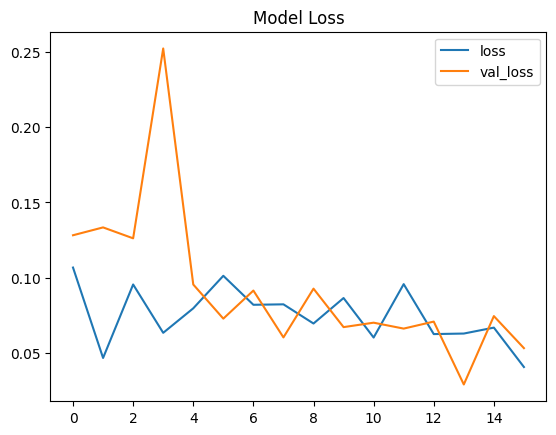

In [9]:
results[['loss','val_loss']].plot(title='Model Loss')

<Axes: title={'center': 'Model Acurracy'}>

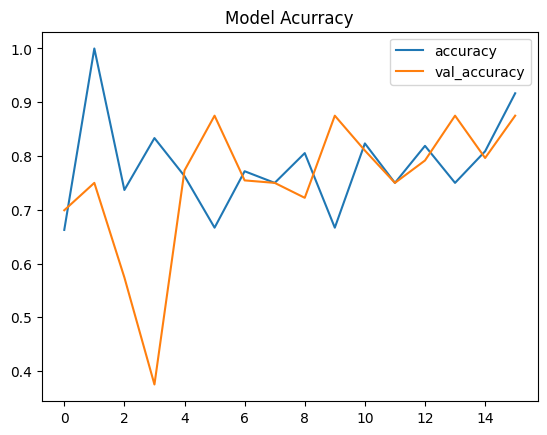

In [10]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')

In [11]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9166666865348816, Val_Accuracy: 0.875
Loss: 0.040713947266340256, Val_Loss: 0.05324758216738701


7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 440ms/step


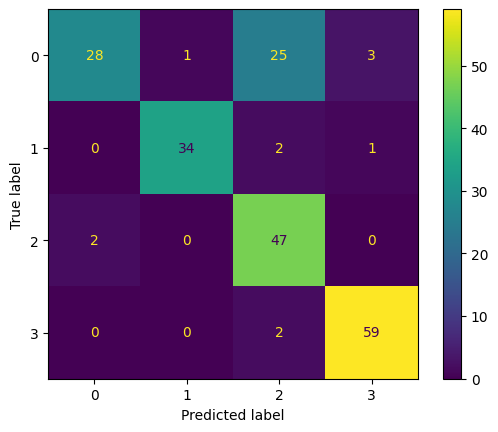

In [12]:
# Collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 16 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

# Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [13]:
# This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


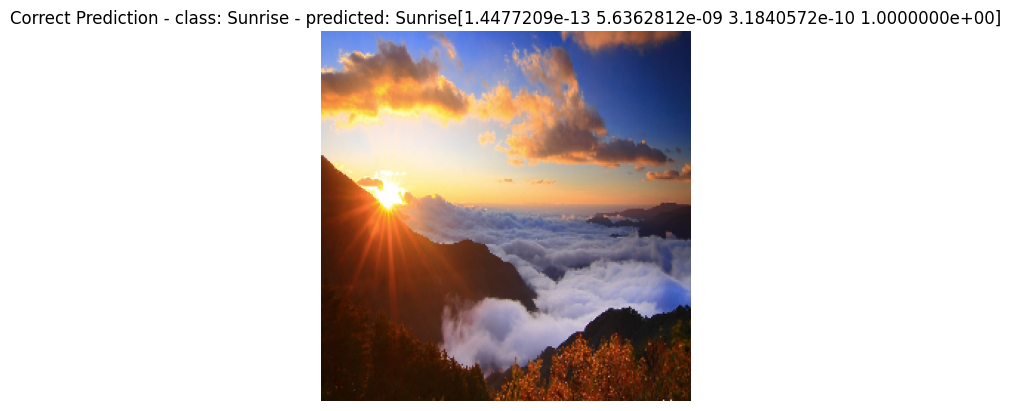

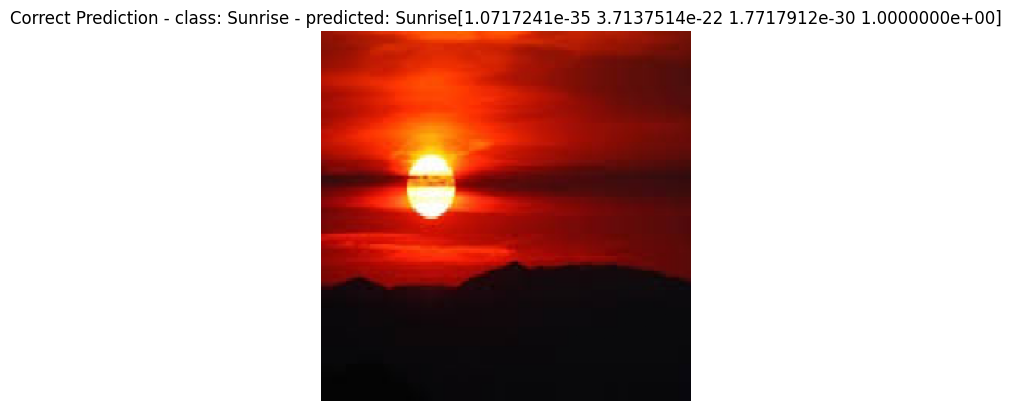

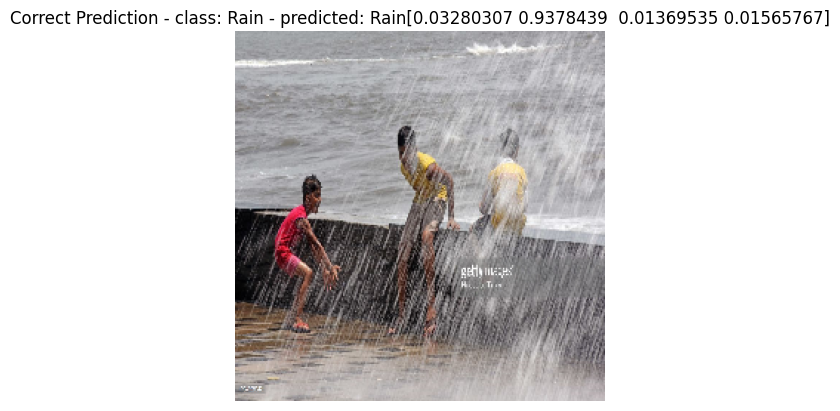

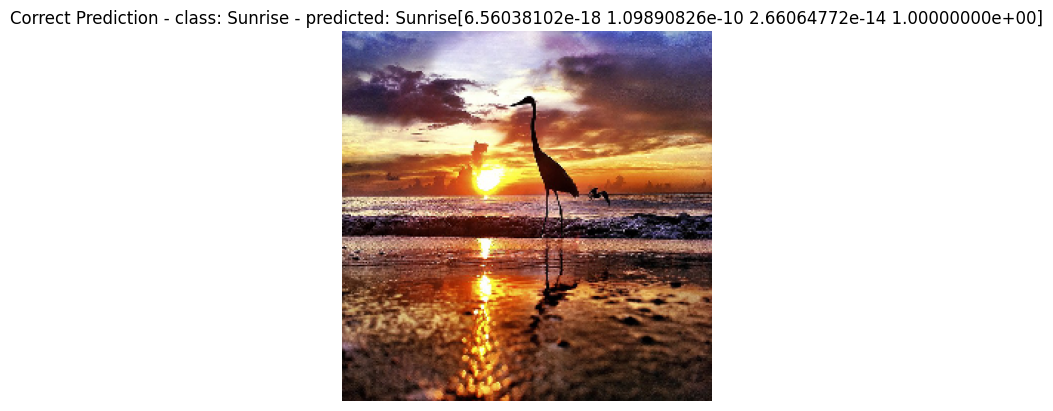

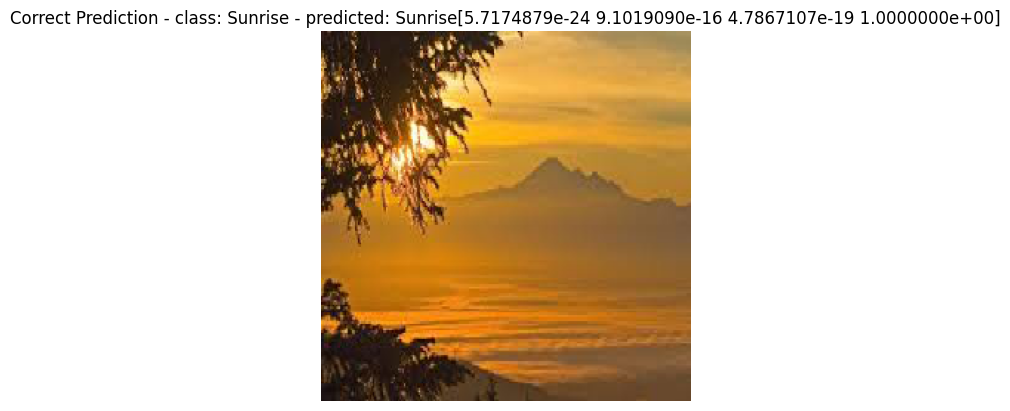

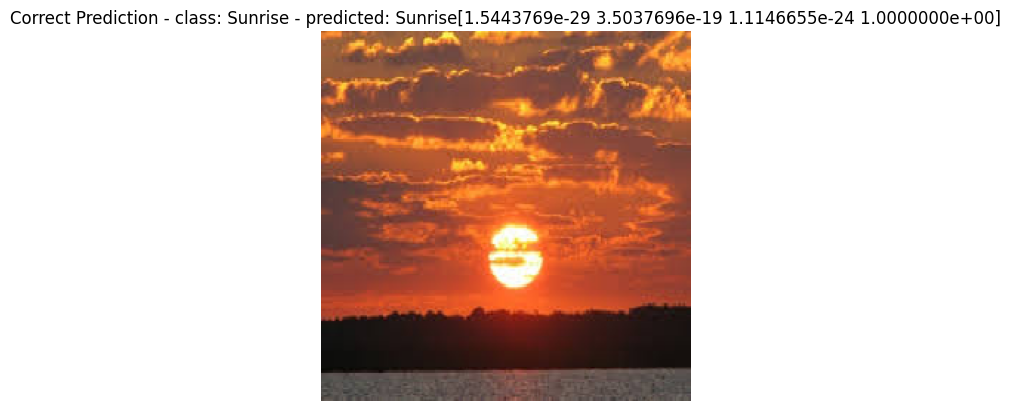

In [14]:
predict_one(model, 6) 